In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

In [36]:
data = pd.read_csv('breastCancer.csv')
feature = data.drop(columns = ['id', 'class', 'bare_nucleoli'])
target = data['class']
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=456)

data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                   699 non-null int64
clump_thickness      699 non-null int64
size_uniformity      699 non-null int64
shape_uniformity     699 non-null int64
marginal_adhesion    699 non-null int64
epithelial_size      699 non-null int64
bare_nucleoli        699 non-null object
bland_chromatin      699 non-null int64
normal_nucleoli      699 non-null int64
mitoses              699 non-null int64
class                699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

y_test_list = y_test.tolist()
a = 0
for i in range(0, len(prediction)):
    if prediction[i] == y_test_list[i]:
        a +=1
print(a)
print(len(prediction))


133
140


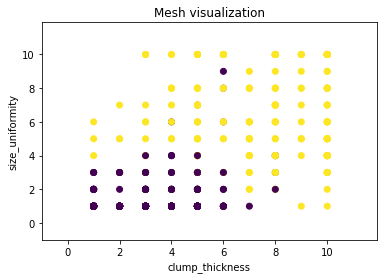

In [71]:
# Our data. Converting from data frames to arrays for the mesh.
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

X = data[['clump_thickness', 'size_uniformity']]
Y = data['class']

X = np.array(X)
Y = np.array(Y)

h=0.1

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - 2
x_max = X[:, 0].max() + 2
y_min = X[:, 1].min() - 2
y_max = X[:, 1].max() + 2
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('clump_thickness')
plt.ylabel('size_uniformity')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


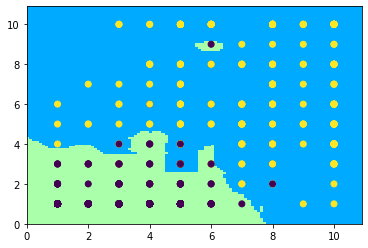

In [82]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# Create color maps
cmap_light = ListedColormap(['#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#00FF00','#00AAFF'])

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
clf.fit(X, Y)

# calculate min, max and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

# predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()

# what is Z in plt.pcolormesh(xx, yy, Z, cmap=cmap_light) ???????????